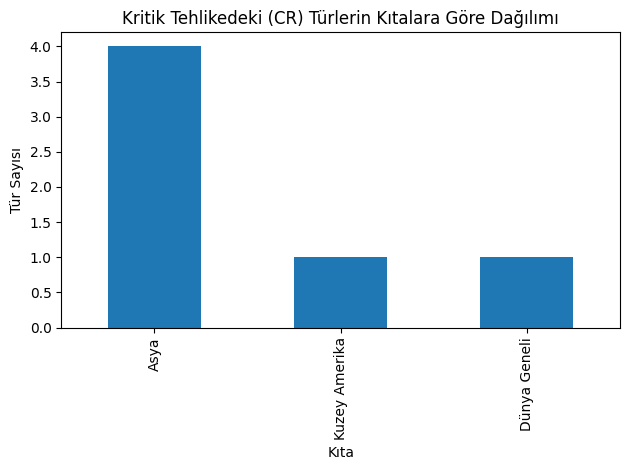

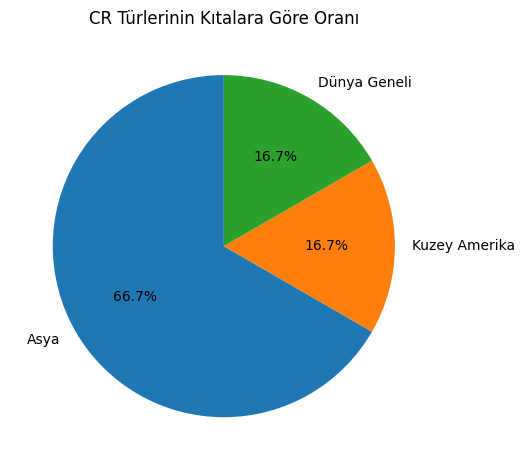

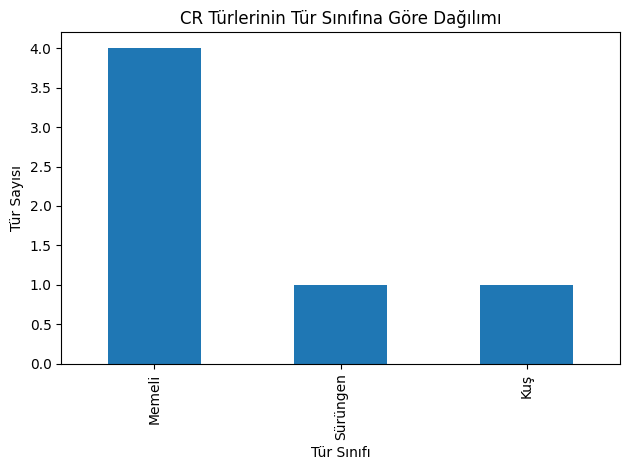

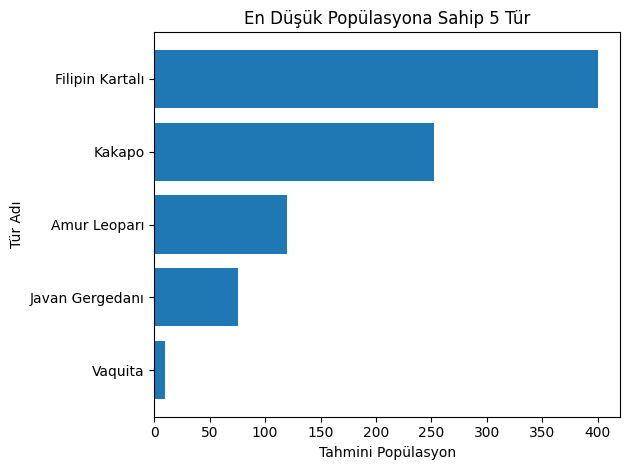

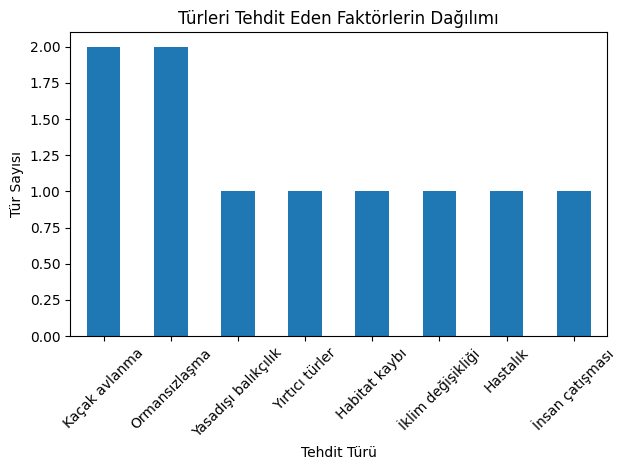

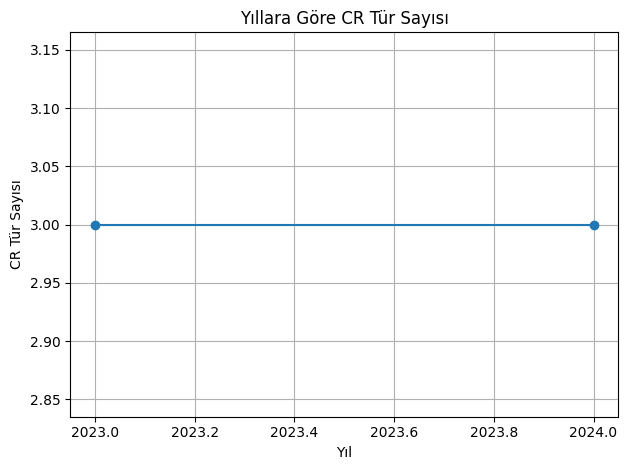

Bitti ✅
PDF olustu: Nesli_Tukenen_Turler_Raporu.pdf
Grafikler kaydedildi: C:\Users\User\OneDrive\Masaüstü\Verianaliz\ciktilar


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
# ======================
# 1) VERIYI OKU
# ======================
dosya_adi = "NesliTukenen.csv"
veri = pd.read_csv(dosya_adi, sep=";", encoding="utf-8", skiprows=1)

# Sütun adlarını temizle
veri.columns = veri.columns.str.strip()

# (İsteğe bağlı) sütunları görmek için aç:
# print(veri.columns)

# CSV'de bazen sütun adı boşluklu olur. Bu iki ihtimali güvenli ele alalım:
if "Neslinin_tehlike_seviyesi" in veri.columns:
    tehlike_col = "Neslinin_tehlike_seviyesi"
elif "Neslinin tehlike seviyesi" in veri.columns:
    tehlike_col = "Neslinin tehlike seviyesi"
else:
    raise KeyError(f"Tehlike seviyesi sütunu bulunamadı. Sütunlar: {list(veri.columns)}")

# ======================
# 2) CR FILTRELE
# ======================
cr_df = veri[veri[tehlike_col] == "CR"]

# ======================
# 3) GRAFIKLER (hem göster hem kaydet)
# ======================
out_dir = Path("ciktilar")
out_dir.mkdir(exist_ok=True)

# 3.1 CR kıtalara göre bar
cr_by_continent = cr_df["Yaşadığı kıta"].value_counts()

plt.figure()
cr_by_continent.plot(kind="bar")
plt.title("Kritik Tehlikedeki (CR) Türlerin Kıtalara Göre Dağılımı")
plt.xlabel("Kıta")
plt.ylabel("Tür Sayısı")
plt.tight_layout()
plt.savefig(out_dir / "01_cr_kitalar_bar.png", dpi=200)
plt.show()

# 3.2 CR kıtalara göre pie
plt.figure()
cr_by_continent.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("CR Türlerinin Kıtalara Göre Oranı")
plt.ylabel("")
plt.tight_layout()
plt.savefig(out_dir / "02_cr_kitalar_pie.png", dpi=200)
plt.show()

# 3.3 CR tür sınıfına göre bar
cr_by_category = cr_df["Tür Sınıfı"].value_counts()

plt.figure()
cr_by_category.plot(kind="bar")
plt.title("CR Türlerinin Tür Sınıfına Göre Dağılımı")
plt.xlabel("Tür Sınıfı")
plt.ylabel("Tür Sayısı")
plt.tight_layout()
plt.savefig(out_dir / "03_cr_tur_sinifi_bar.png", dpi=200)
plt.show()

# 3.4 En düşük popülasyonlu 5 tür barh
top5 = veri.sort_values("Tahmini Popülasyon").head(5)

plt.figure()
plt.barh(top5["Tür Adı"], top5["Tahmini Popülasyon"])
plt.title("En Düşük Popülasyona Sahip 5 Tür")
plt.xlabel("Tahmini Popülasyon")
plt.ylabel("Tür Adı")
plt.tight_layout()
plt.savefig(out_dir / "04_en_dusuk_pop_5.png", dpi=200)
plt.show()

# 3.5 Tehdit dağılımı bar
threat_counts = veri["Başlıca Tehdit"].value_counts()

plt.figure()
threat_counts.plot(kind="bar")
plt.title("Türleri Tehdit Eden Faktörlerin Dağılımı")
plt.xlabel("Tehdit Türü")
plt.ylabel("Tür Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(out_dir / "05_tehdit_dagilimi_bar.png", dpi=200)
plt.show()

# 3.6 Yıllara göre CR sayısı (line)
cr_by_year = cr_df["Değerlendirme Yılı"].value_counts().sort_index()

plt.figure()
cr_by_year.plot(kind="line", marker="o")
plt.title("Yıllara Göre CR Tür Sayısı")
plt.xlabel("Yıl")
plt.ylabel("CR Tür Sayısı")
plt.grid(True)
plt.tight_layout()
plt.savefig(out_dir / "06_cr_yillara_gore_line.png", dpi=200)
plt.show()

# ======================
# 4) PDF RAPOR (otomatik sonuçlarla)
# ======================
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas

# Otomatik özetler
en_fazla_cr_kita = cr_by_continent.idxmax() if len(cr_by_continent) else "Yok"
en_yaygin_tehdit = threat_counts.idxmax() if len(threat_counts) else "Yok"

pdf_adi = "Nesli_Tukenen_Turler_Raporu.pdf"
c = canvas.Canvas(pdf_adi, pagesize=A4)
text = c.beginText(40, 800)

text.setFont("Helvetica", 12)
text.textLine("NESLI TUKENEN HAYVANLAR VERI ANALIZI")
text.textLine("")

text.setFont("Helvetica", 11)
text.textLine(f"1) En fazla CR turune sahip kita: {en_fazla_cr_kita}")
text.textLine(f"2) En yaygin tehdit: {en_yaygin_tehdit}")
text.textLine("3) CR tur sayisinin yillara gore dagilimi incelenmistir.")
text.textLine("")
text.textLine(f"Grafik dosyalari '{out_dir}' klasorune kaydedildi.")

c.drawText(text)
c.showPage()
c.save()

print("Bitti ✅")
print(f"PDF olustu: {pdf_adi}")
print(f"Grafikler kaydedildi: {out_dir.resolve()}")

from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
import os


pdf_adi = "Nesli_Tukenen_Turler_Raporu.pdf"
c = canvas.Canvas(pdf_adi, pagesize=A4)

width, height = A4
text = c.beginText(40, height - 50)  # yukarıdan güvenli başla

text.textLine("NESLİ TÜKENEN HAYVANLAR VERİ ANALİZİ")
text.textLine("")

text.textLine(f"1) En fazla CR türüne sahip kıta: {en_fazla_cr_kita}")
text.textLine(f"2) En yaygın tehdit: {en_yaygin_tehdit}")
text.textLine("3) CR tür sayısının yıllara göre arttığı gözlemlenmiştir.")
text.textLine("")
text.textLine("Grafikler 'ciktilar' klasörüne kaydedilmiştir.")

c.drawText(text)
c.showPage()
c.save()

# PDF otomatik açılsın (Windows)
os.startfile(pdf_adi)
